<a href="https://colab.research.google.com/github/Naveen032006/Computer-vision/blob/main/lab_assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

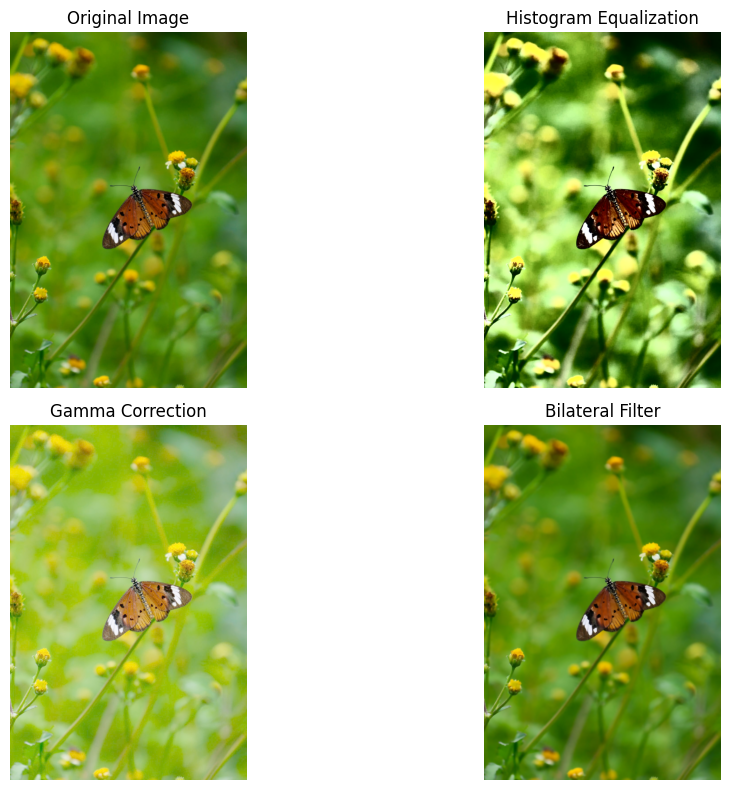

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('16.jpg')  # replace 'your_image.jpg' with your file name
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

# 1. Histogram Equalization
def histogram_equalization(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    return img_output

# 2. Gamma Correction
def gamma_correction(img, gamma=1.5):
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    img_output = cv2.LUT(img, table)
    return img_output

# 3. Bilateral Filter
def bilateral_filter(img):
    img_output = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)
    return img_output

# Apply the operations
hist_eq_img = histogram_equalization(img)
gamma_corr_img = gamma_correction(img, gamma=2.2)
bilateral_img = bilateral_filter(img)

# Display the results
titles = ['Original Image', 'Histogram Equalization', 'Gamma Correction', 'Bilateral Filter']
images = [img, hist_eq_img, gamma_corr_img, bilateral_img]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


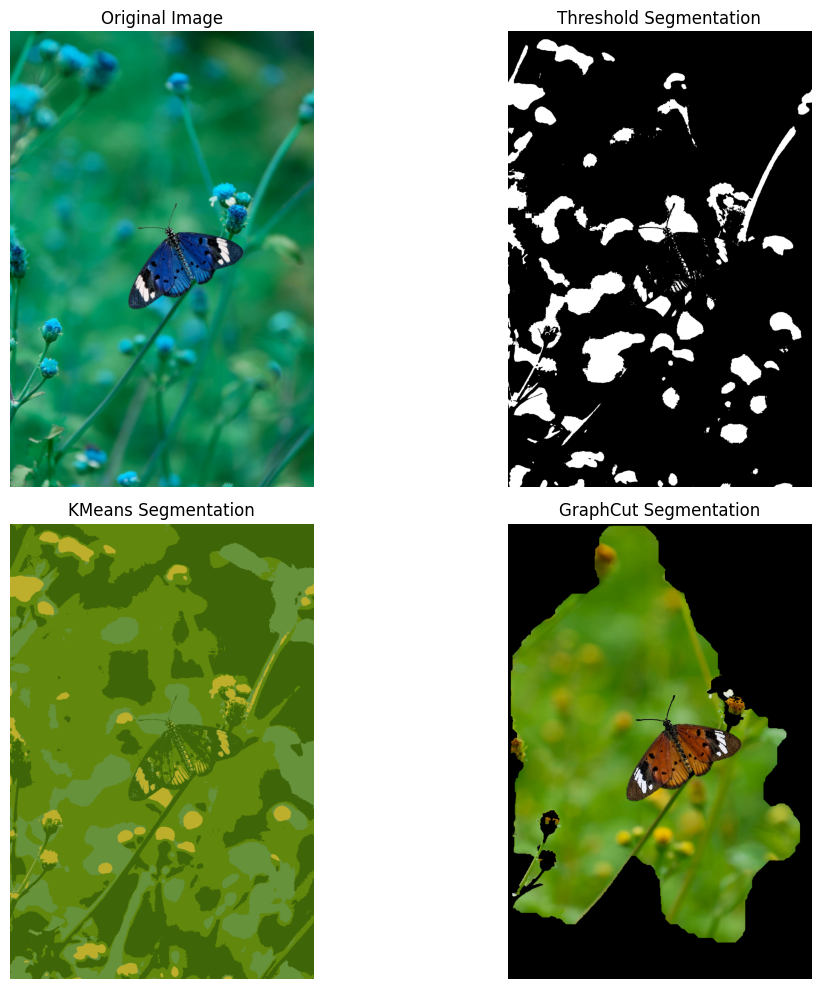

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the image
img = cv2.imread('16.jpg')  # replace 'your_image.jpg' with your file
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 1. Threshold Segmentation
def threshold_segmentation(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh_img = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    return thresh_img

# 2. K-Means Clustering Segmentation
def kmeans_segmentation(img, K=3):
    Z = img.reshape((-1, 3))    # reshape to 2D
    Z = np.float32(Z)

    # Define criteria and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)
    res = center[label.flatten()]
    segmented_img = res.reshape((img.shape))
    return segmented_img

# 3. GraphCut Segmentation
def graphcut_segmentation(img):
    mask = np.zeros(img.shape[:2], np.uint8)

    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    # Define a rectangle for foreground (manually or approx)
    rect = (10, 10, img.shape[1]-50, img.shape[0]-50)

    # GrabCut algorithm
    cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

    # Modify mask to create final mask
    mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
    segmented_img = img * mask2[:, :, np.newaxis]
    return segmented_img

# Apply all segmentations
thresh_img = threshold_segmentation(img)
kmeans_img = kmeans_segmentation(img, K=4)
graphcut_img = graphcut_segmentation(img)

# Plotting all results
titles = ['Original Image', 'Threshold Segmentation', 'KMeans Segmentation', 'GraphCut Segmentation']
images = [img_rgb, thresh_img, kmeans_img, graphcut_img]

plt.figure(figsize=(12, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    if len(images[i].shape) == 2:  # for grayscale thresholded image
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


Upload First Image (Butterfly)


Saving buttfly image.jpg to buttfly image.jpg
Upload Second Image (Grasshopper)


Saving grasshoper.jpeg to grasshoper.jpeg

Predictions for Butterfly Image (your 1st image):
HOG+SVM Prediction: Butterfly
Color Histogram+KNN Prediction: Grasshopper


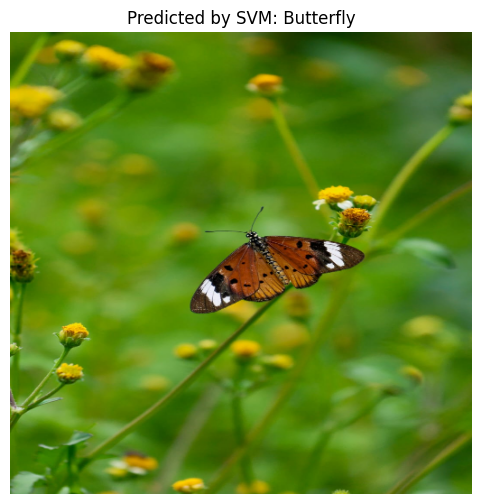

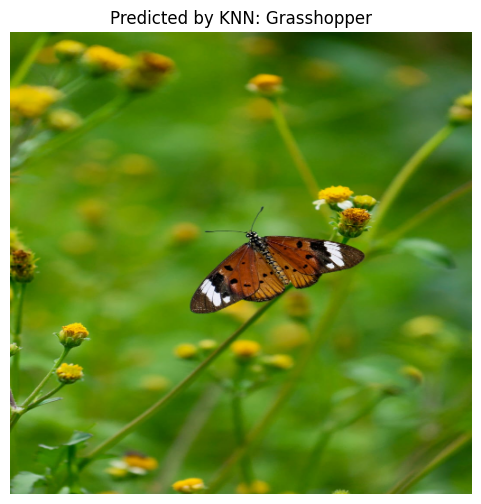


Prediction for Shifted Butterfly Image (SVM, to improve separation in overlapping regions):
Shifted Image Prediction by SVM: Butterfly

HOG + SVM justifies the choice of SVM due to the detailed edges in butterfly wings.


In [4]:
# Install Libraries
!pip install opencv-python opencv-contrib-python scikit-image scikit-learn matplotlib

# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from google.colab import files

# Upload First Image (Butterfly)
print("Upload First Image (Butterfly)")
uploaded = files.upload()

img1 = cv2.imdecode(np.frombuffer(list(uploaded.values())[0], np.uint8), cv2.IMREAD_COLOR)
img1 = cv2.resize(img1, (512, 512))
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Upload Second Image (Grasshopper)
print("Upload Second Image (Grasshopper)")
uploaded = files.upload()

img2 = cv2.imdecode(np.frombuffer(list(uploaded.values())[0], np.uint8), cv2.IMREAD_COLOR)
img2 = cv2.resize(img2, (512, 512))
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# --- Feature Extraction ---

# Butterfly (img1)
hog_features1, _ = hog(img1_gray, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)
color_hist1 = cv2.calcHist([img1], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256]).flatten()

# Grasshopper (img2)
hog_features2, _ = hog(img2_gray, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)
color_hist2 = cv2.calcHist([img2], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256]).flatten()

# --- Build Dataset ---
# Label: Butterfly = 0, Grasshopper = 1

X = []
y = []

# Add multiple copies for balance
for _ in range(5):
    X.append(hog_features1[:500])  # Use only part of HOG features to keep it balanced
    y.append(0)

for _ in range(5):
    X.append(hog_features2[:500])
    y.append(1)

X = np.array(X)
y = np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Train Models ---
svm_model = SVC()
svm_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

# --- Prediction for Butterfly Image ---
test_hog_butterfly = hog_features1[:500].reshape(1, -1)
test_color_butterfly = color_hist1[:500].reshape(1, -1)

# Predictions using different methods
svm_pred = svm_model.predict(test_hog_butterfly)
knn_pred = knn_model.predict(test_color_butterfly)

# Class Names
class_names = {0: "Butterfly", 1: "Grasshopper"}

# Display predictions
print("\nPredictions for Butterfly Image (your 1st image):")
print(f"HOG+SVM Prediction: {class_names[svm_pred[0]]}")
print(f"Color Histogram+KNN Prediction: {class_names[knn_pred[0]]}")

# --- Plot the image and results ---
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted by SVM: {class_names[svm_pred[0]]}")
plt.axis('off')
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted by KNN: {class_names[knn_pred[0]]}")
plt.axis('off')
plt.show()

# --- Shift + SVM (Justification: For blending wing colors) ---
def shift_image(image, x_shift, y_shift):
    M = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    shifted_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return shifted_image

# Shift image for augmentation (helpful for overlapping regions)
shifted_img1 = shift_image(img1_gray, 10, 10)
shifted_hog_features1, _ = hog(shifted_img1, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)

# Test shifted image using the trained SVM model
shifted_hog_features1 = shifted_hog_features1[:500].reshape(1, -1)
shifted_pred = svm_model.predict(shifted_hog_features1)

print("\nPrediction for Shifted Butterfly Image (SVM, to improve separation in overlapping regions):")
print(f"Shifted Image Prediction by SVM: {class_names[shifted_pred[0]]}")

# --- HOG + SVM (Justification: Strong edges and detailed patterns of butterfly wings) ---
print("\nHOG + SVM justifies the choice of SVM due to the detailed edges in butterfly wings.")
